<a href="https://colab.research.google.com/github/elishaayinoluwa/Machine_learning_projects/blob/main/Keras_fashion_mnist/keras_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and getting the Dataset 

In [1]:
import tensorflow as tf
from tensorflow import keras
import pydot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets import fashion_mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


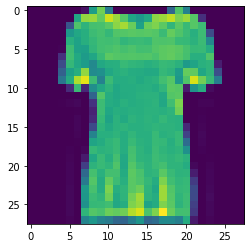

In [4]:
# Data Visualization
plt.imshow(X_train_full[10])

In [5]:
y_train_full[10]

0

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train_full[10]]

'T-shirt/top'

# Data Normalization

In [8]:
X_train_n = X_train_full / 255.0
X_test_n = X_test / 255.0

# Splitting Data Into Training, Validation and Testing Data

In [9]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

# Building the Neural Network. 

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


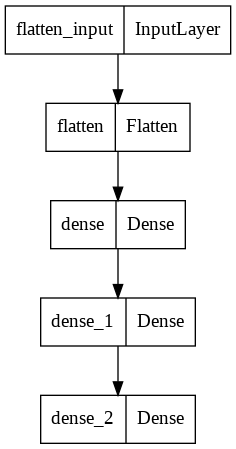

In [13]:
keras.utils.plot_model(model)

In [14]:
weights, biases = model.layers[1].get_weights()

In [15]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [16]:
weights.shape

(784, 300)

In [17]:
biases.shape

(300,)

# Compiling and Training and Neural Network

In [18]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics=["accuracy"])

In [19]:
model_history = model.fit(X_train, y_train, epochs=60, validation_data=(X_valid, y_valid))

Epoch 1/60
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/60
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/60
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4391 - accuracy: 0.8457 - val_loss: 0.5333 - val_accuracy: 0.7988
Epoch 4/60
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4123 - accuracy: 0.8564 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 5/60
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3939 - accuracy: 0.8616 - val_loss: 0.3741 - val_accuracy: 0.8698
Epoch 6/60
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3751 - accuracy: 0.8678 - val_loss: 0.3706 - val_accuracy: 0.8726
Epoch 7/60
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3630 - accuracy: 0.8715 - val_loss: 0.3621 - val_accuracy

In [20]:
model_history.params

{'epochs': 60, 'steps': 1719, 'verbose': 1}

(0.0, 30.0)

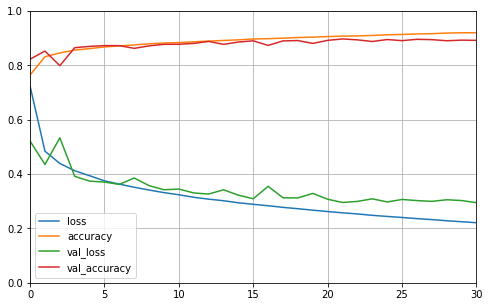

In [21]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim((0,1))
plt.xlim((0,30))

# Evaluating Performace and Predicting

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3419 - accuracy: 0.8900


[0.3418501317501068, 0.8899999856948853]

In [23]:
X_new = X_test[:3]

In [24]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
y_pred = model.predict(X_new)


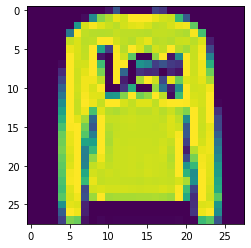

In [26]:
plt.imshow(X_test[1])

In [27]:
y_predict = np.argmax(y_proba, axis=1)

In [28]:
np.array(class_names)[y_predict]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

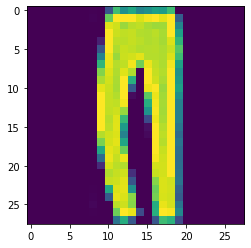

In [29]:
plt.imshow(X_test[2])